### Absolute projections of CORDEX inputs

In [2]:
import xarray
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
import matplotlib as mpl
import warnings

In [2]:
# 0 = Whole UK
# 1 = East Midlands
# 2 = East of England
# 3 = East Scotland
# 4 = London
# 5 = North-East England
# 6 = North Scotland
# 7 = North-West England
# 8 = South-East England
# 9 = South-West England
# 10 = West Midlands
# 11 = West Scotland
# 12 = Yorkshire and Humberside
# 13 = Channel Islands?
# 14 = Isle of Man?
# 15 = Northern Ireland
# 16 = Wales

In [3]:
def get_cordex_addresses():
    models = pd.read_csv('cordex_models.txt', sep='\t')

    # Getting file strings:
        # Directories:
    root = '/data/met/ukcordex/'
    directories = [root + models['GCM'][i] + '/' +
                   models['RCM'][i] + '/' +
                   models['Ensemble'][i] + '/dmo/'
                   for i in range(models.shape[0])]

        # Filenames:
    #feat. clunky for loops and error handling!
    tas_files  = []
    hurs_files = []
    pr_files   = []
    wind_files = []
    err_indexs = []
    print(type(err_indexs))
    for i in range(models.shape[0]):
        try:
            for f_name in os.listdir(directories[i]):
                if f_name.startswith('tas_'):
                    tas_files.append(str(f_name))
                if f_name.startswith('hurs_'):
                    hurs_files.append(str(f_name))
                if f_name.startswith('sfcWind_'):
                    wind_files.append(str(f_name))
                if f_name.startswith('pr_'):
                    pr_files.append(str(f_name))

        except OSError as error:
            print(f'Inelligible directory at: {directories[i]}')
            err_indexs.append(int(i))


    for i in range(len(err_indexs)):
        del directories[err_indexs[i]]
    
    return directories,tas_files,hurs_files,wind_files,pr_files

In [4]:
directories,tas_files,hurs_files,wind_files,pr_files = get_cordex_addresses()
print(directories[1]+tas_files[1])

<class 'list'>
/data/met/ukcordex/CNRM-CERFACS-CNRM-CM5/HadREM3-GA7-05/r1i1p1/dmo/tas_natgb_CNRM-CERFACS-CNRM-CM5_rcp85_r1i1p1_MOHC-HadREM3-GA7-05_v2_day_19801201-20801130.nc


In [5]:
region_data  = xarray.open_dataset('/home/theo/data/ukcp18-uk-land-region-rll.nc')
region_mask = region_data.admin_region
region_mask = np.nan_to_num(region_mask)
directories,tas_files,hurs_files,wind_files,pr_files = get_cordex_addresses()
mask = (region_mask == 0).astype(int)
mask = np.logical_not(mask)

<class 'list'>


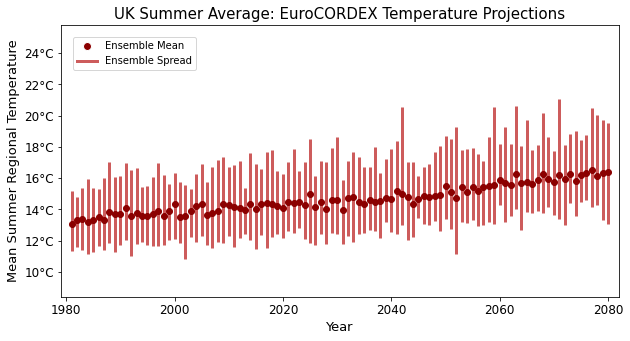

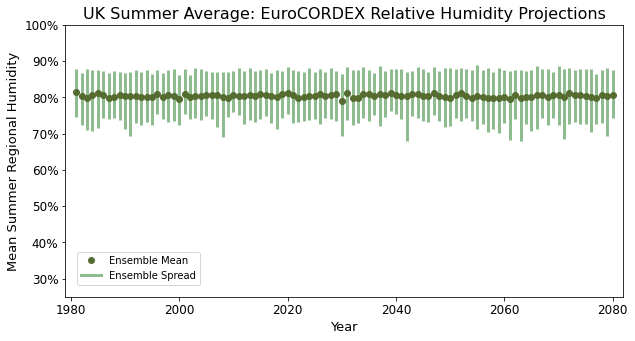

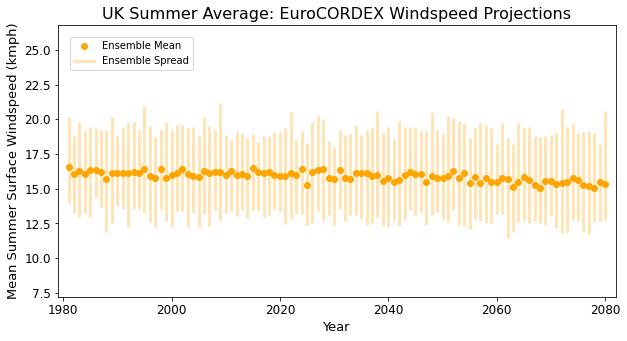

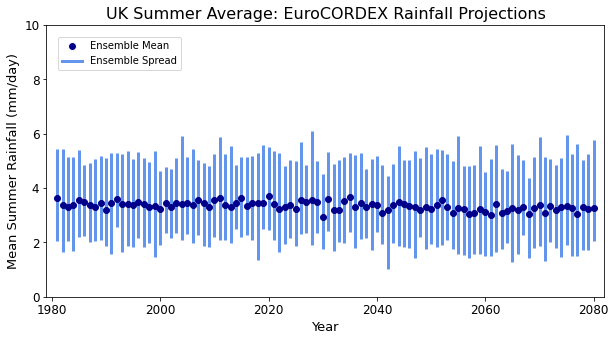

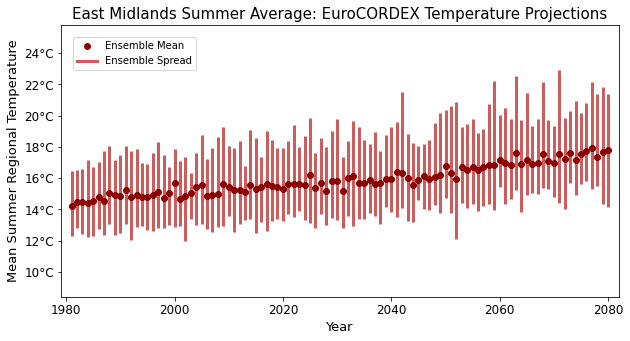

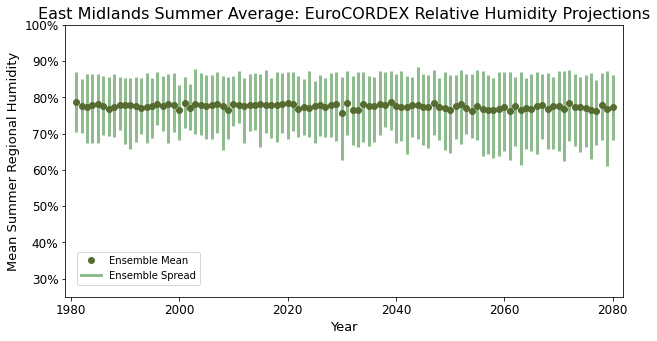

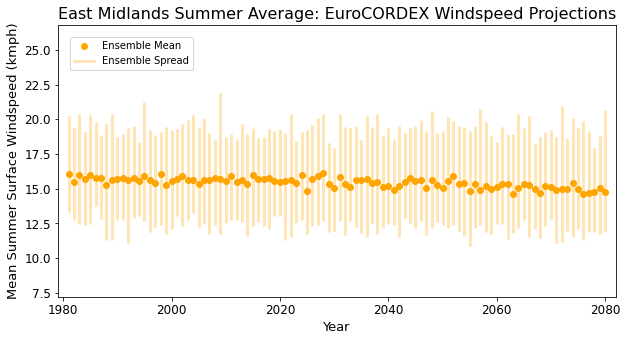

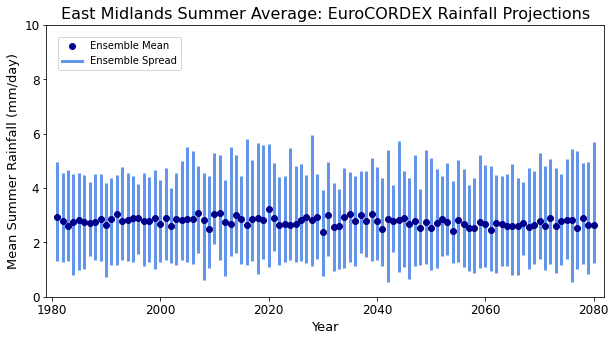

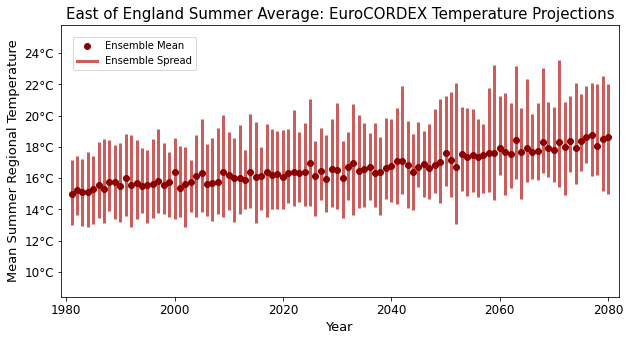

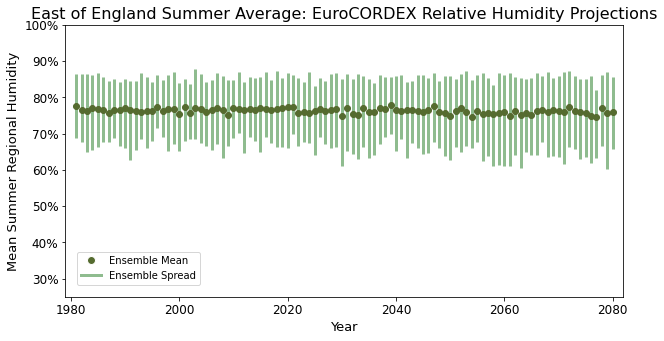

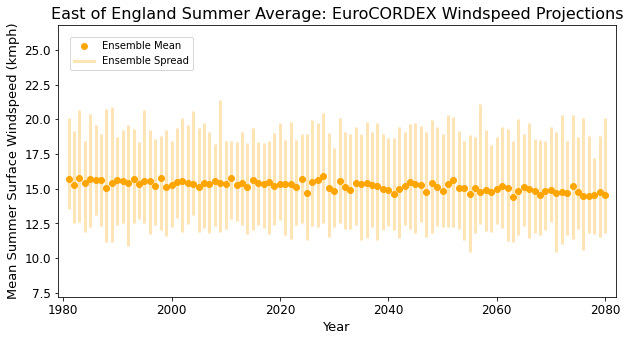

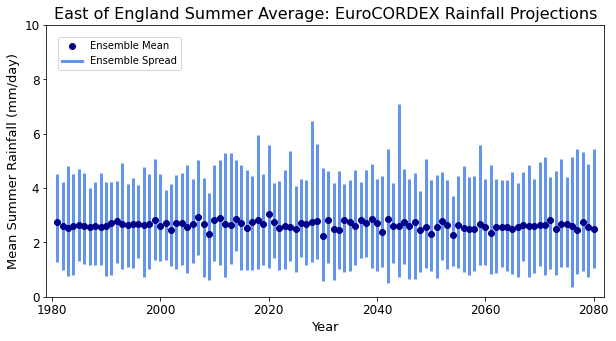

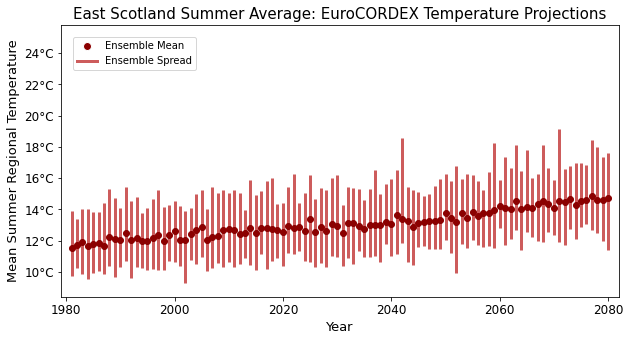

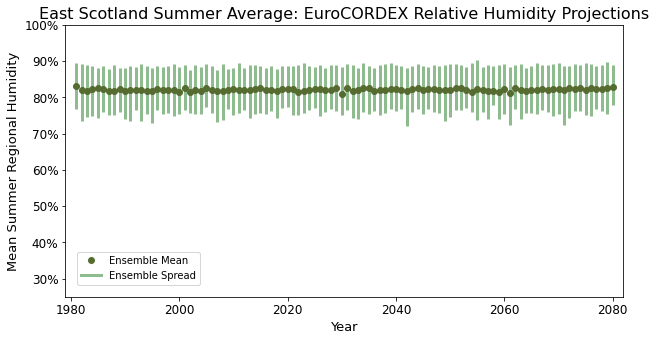

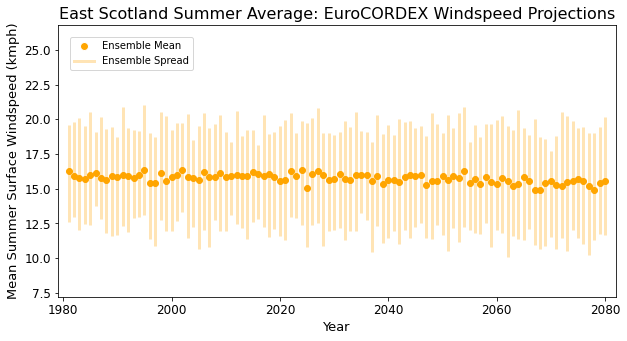

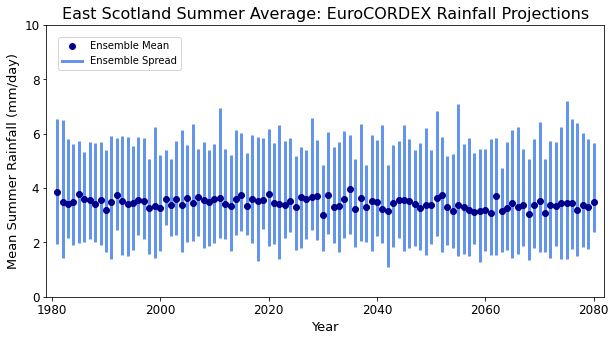

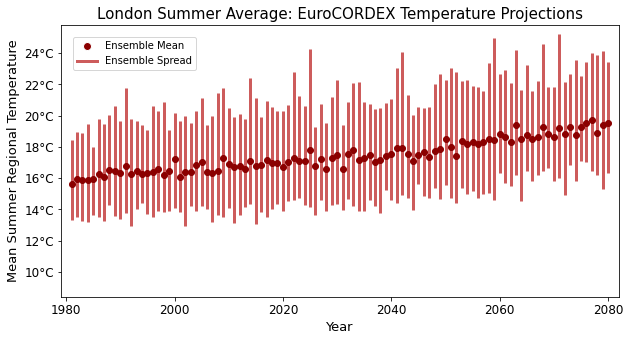

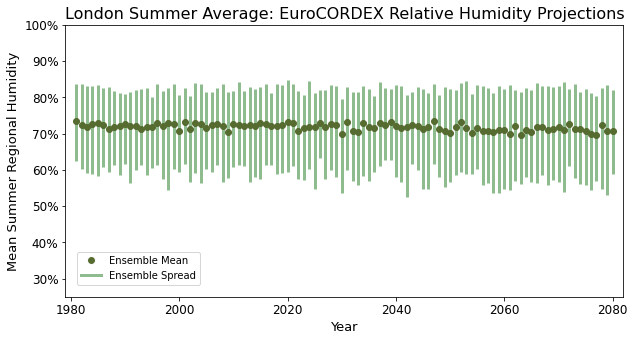

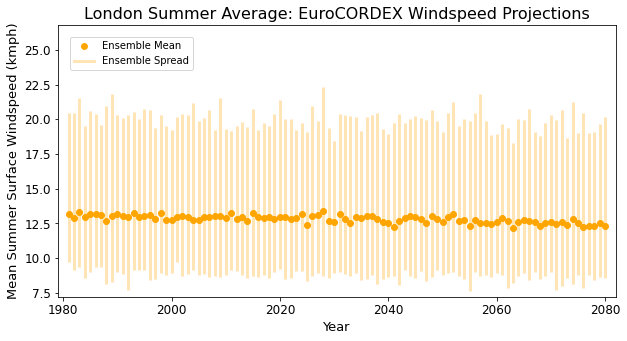

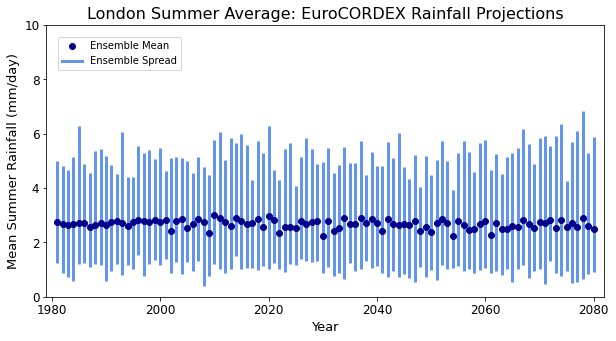

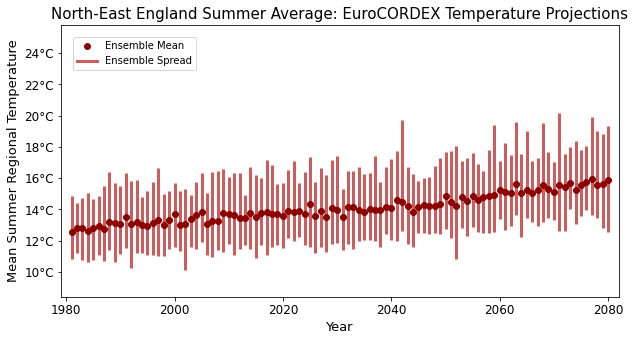

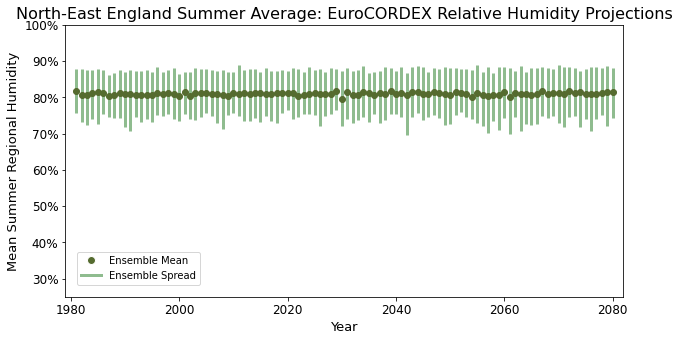

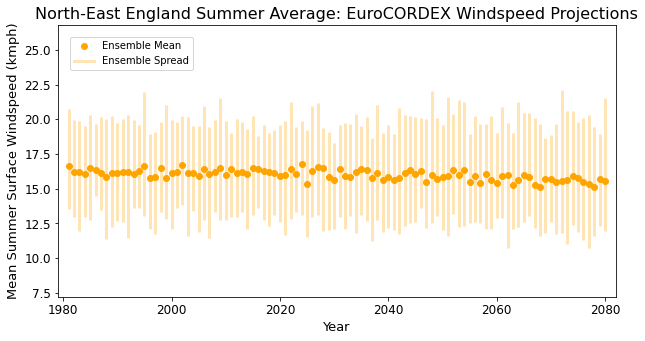

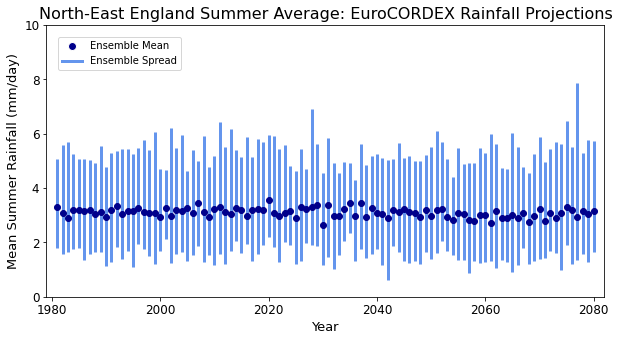

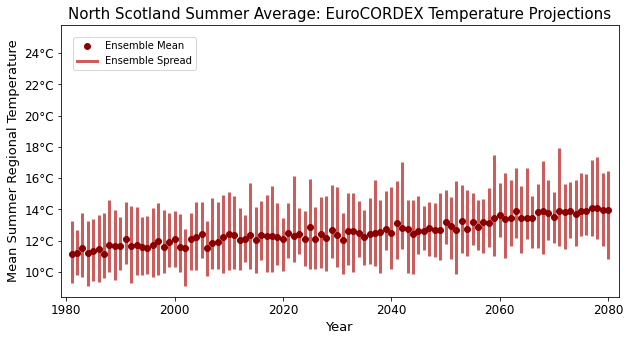

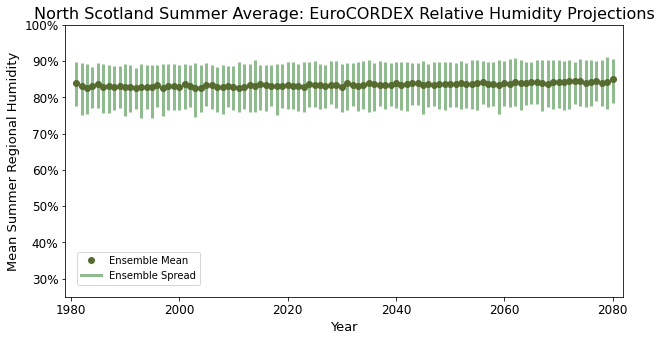

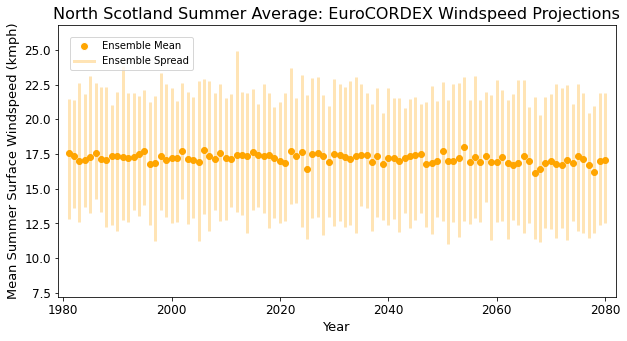

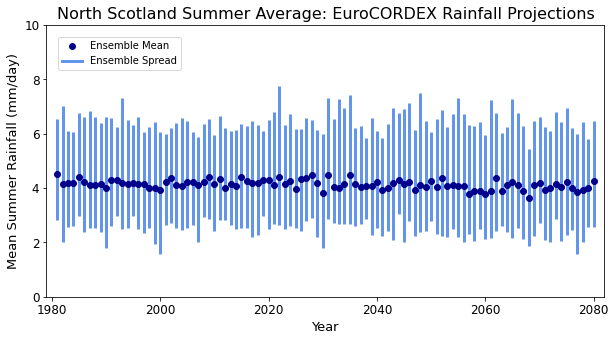

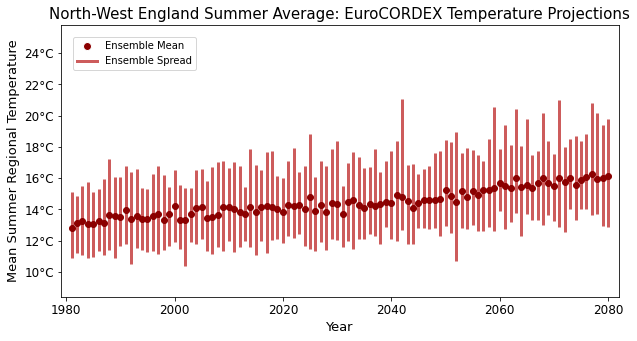

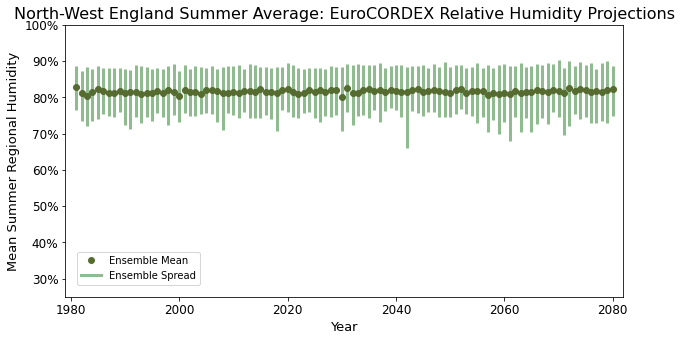

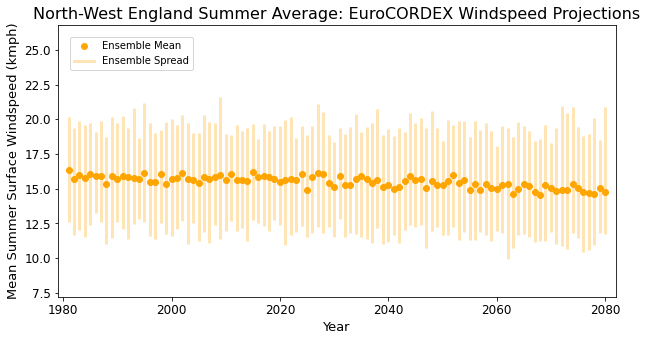

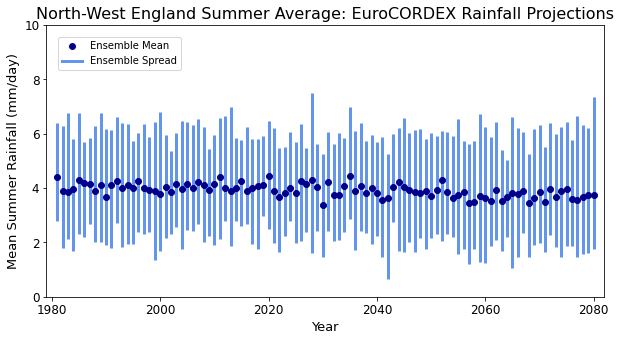

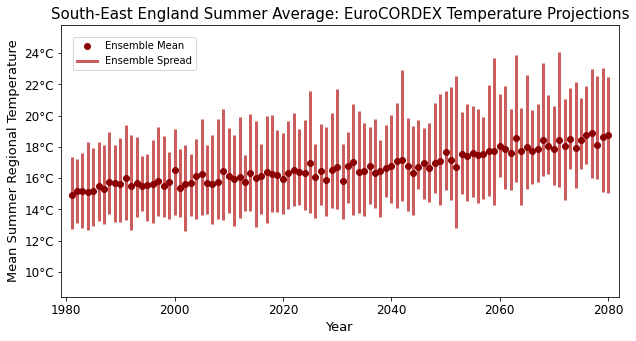

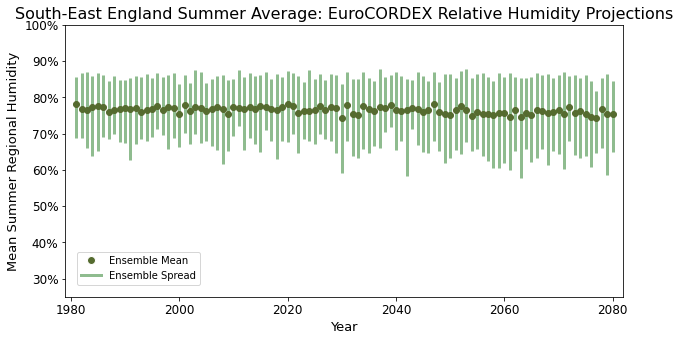

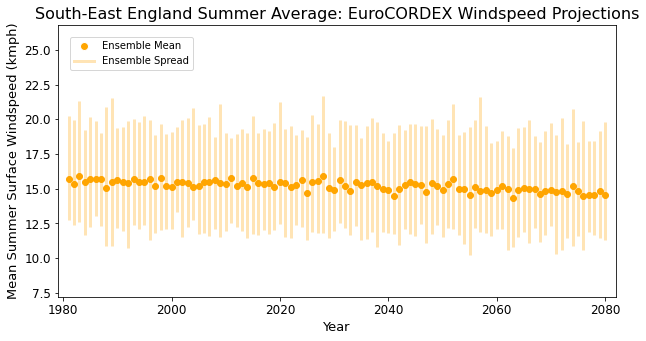

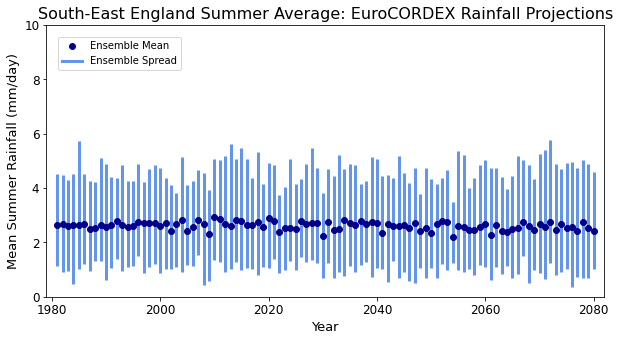

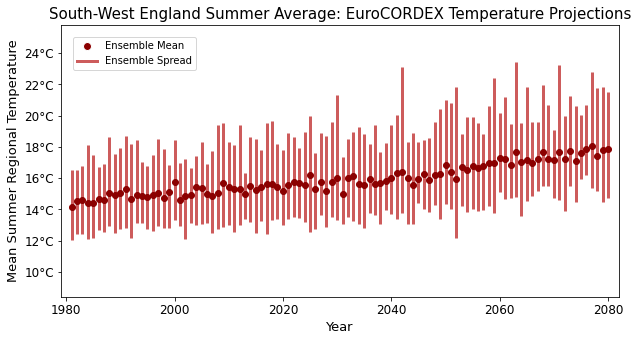

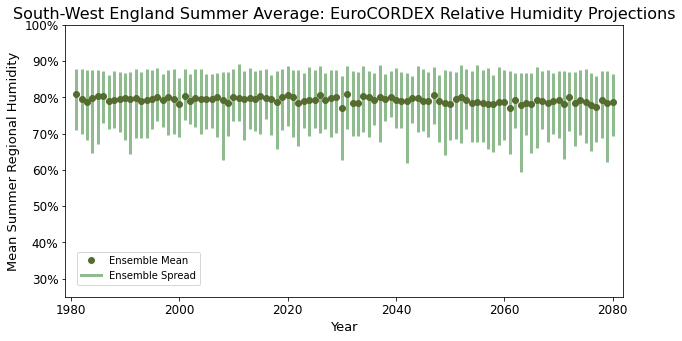

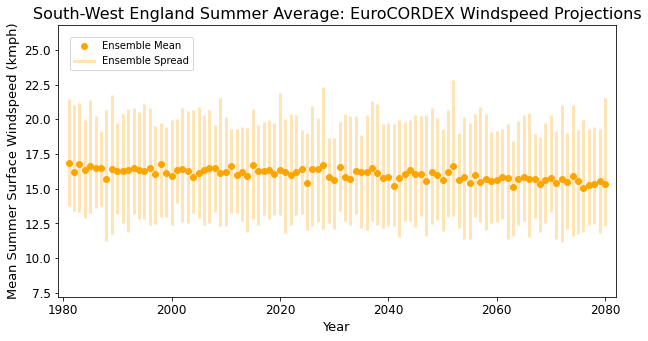

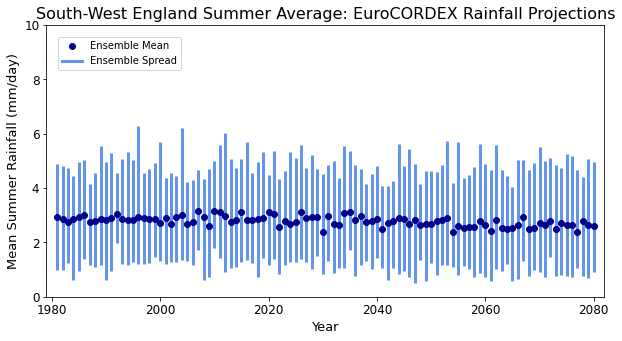

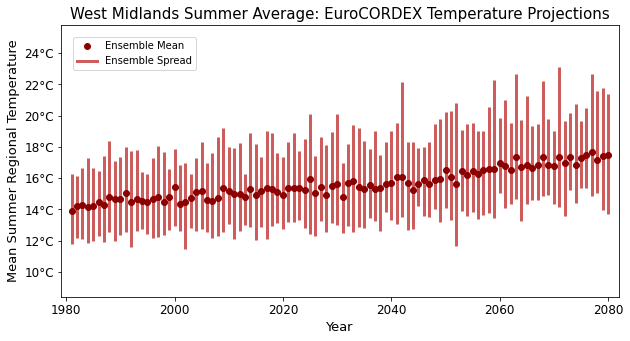

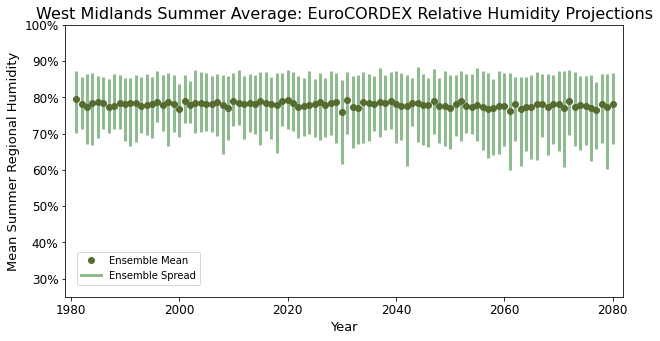

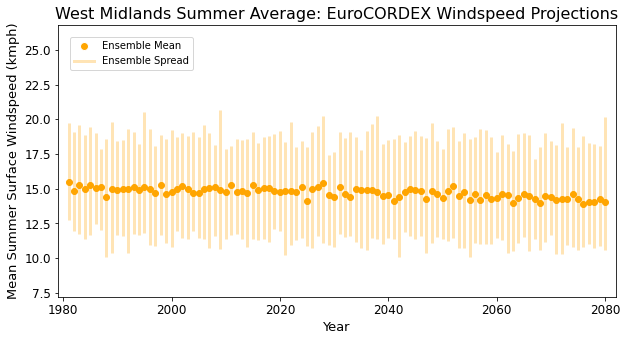

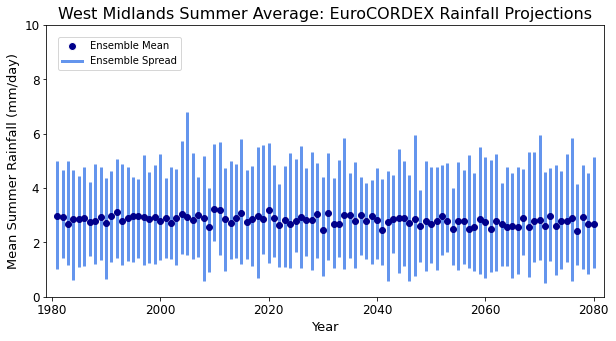

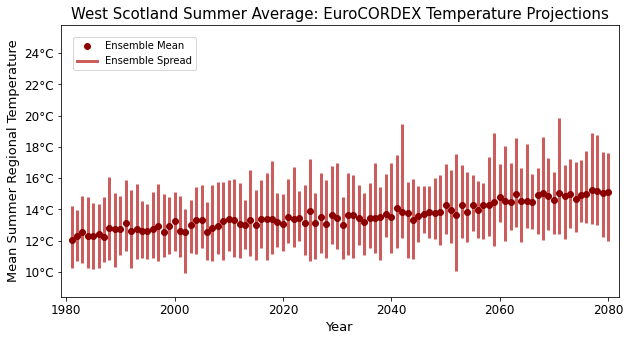

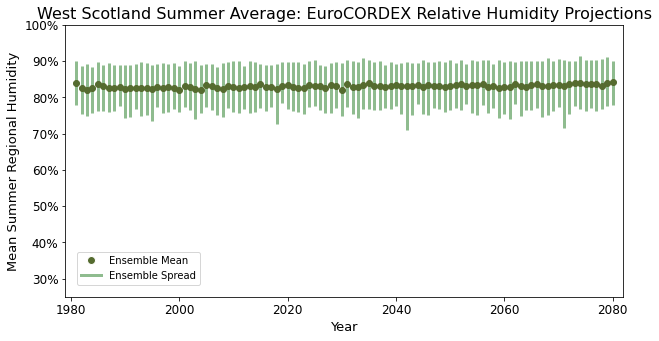

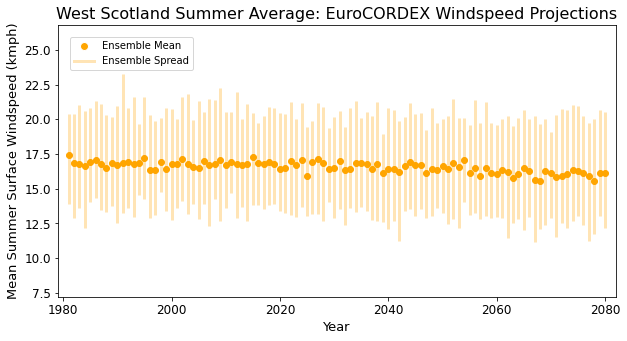

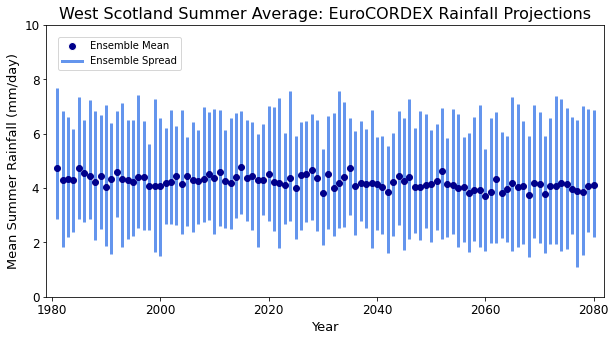

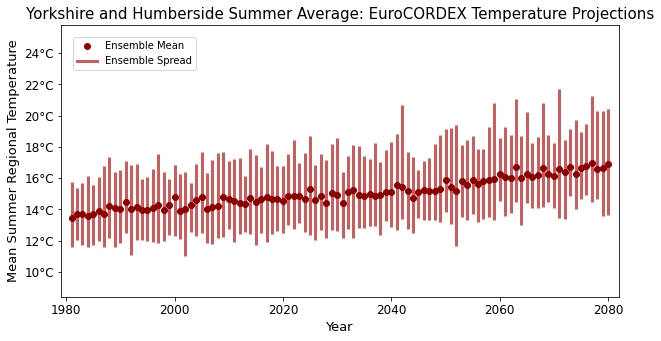

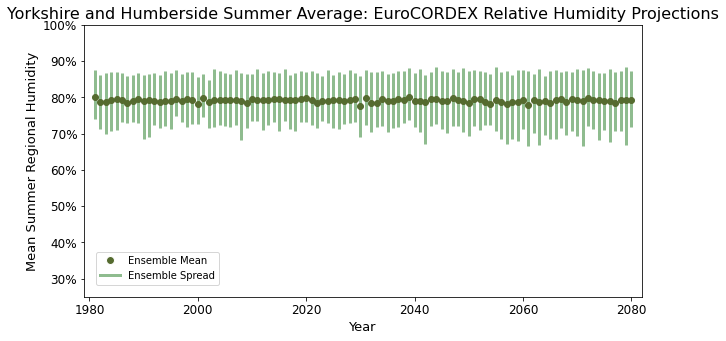

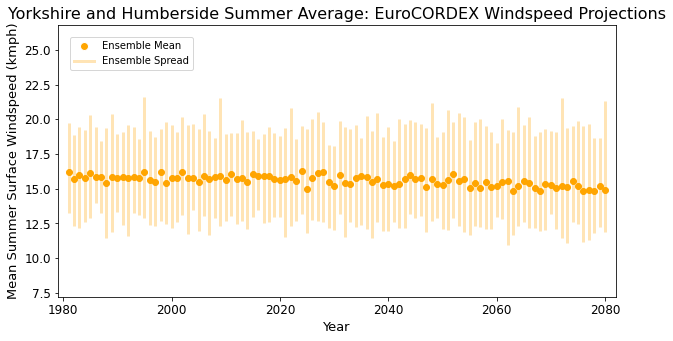

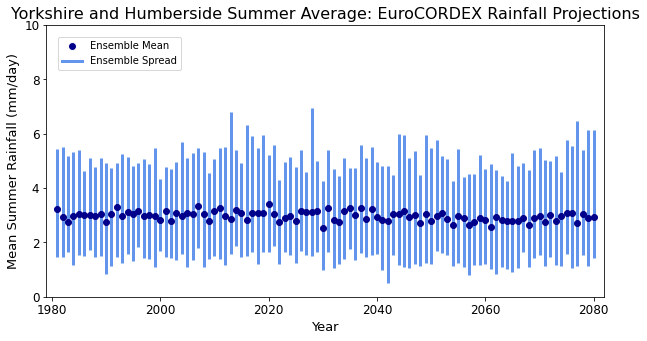

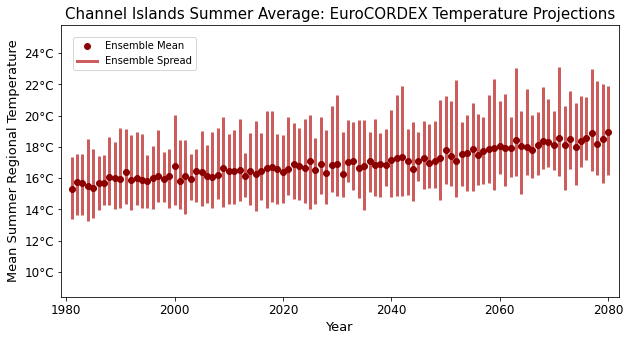

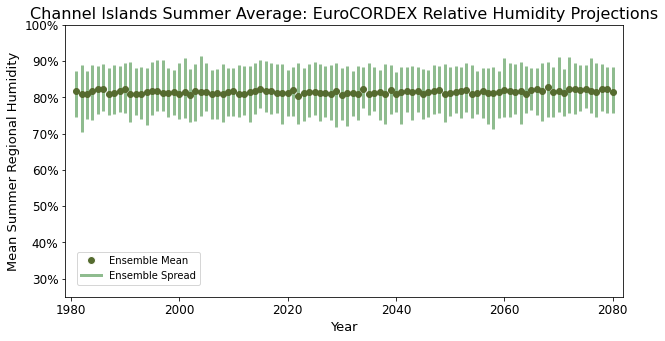

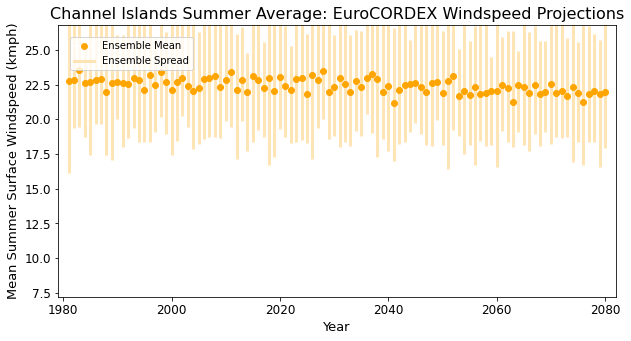

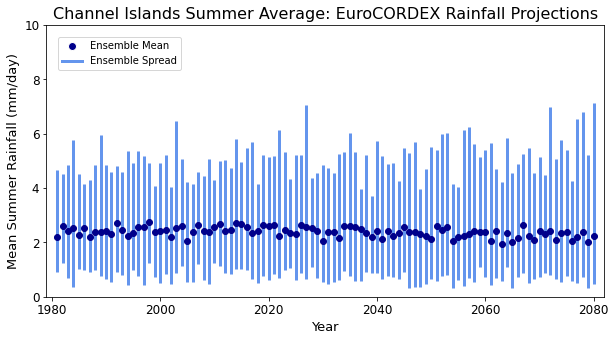

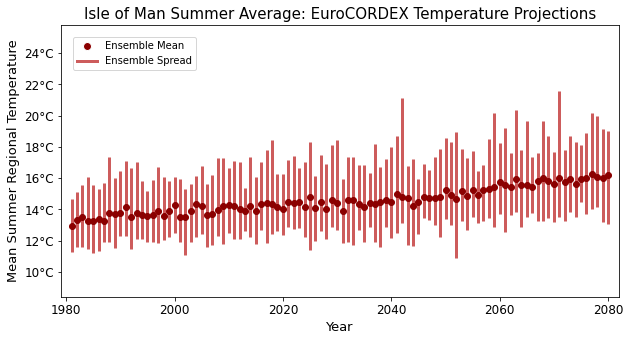

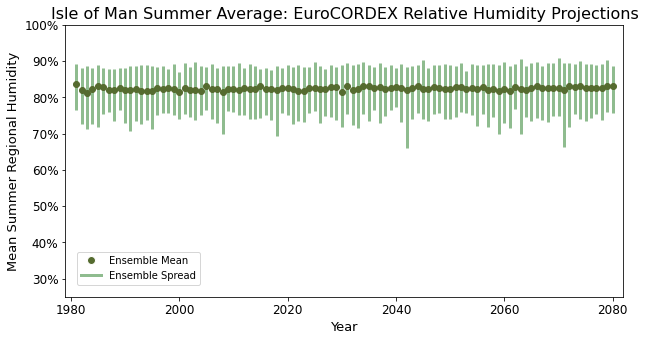

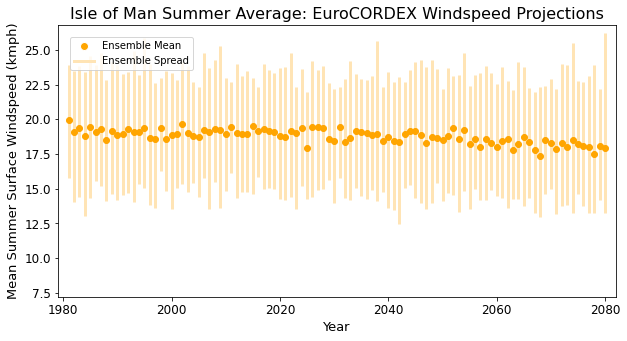

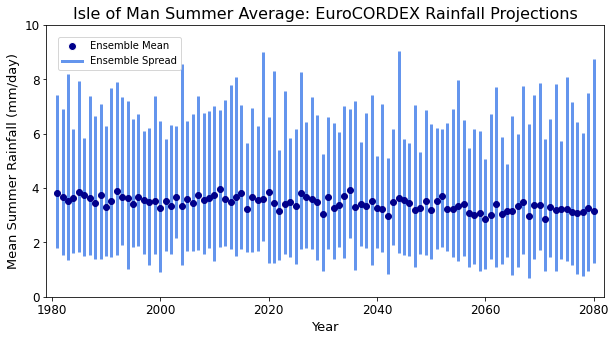

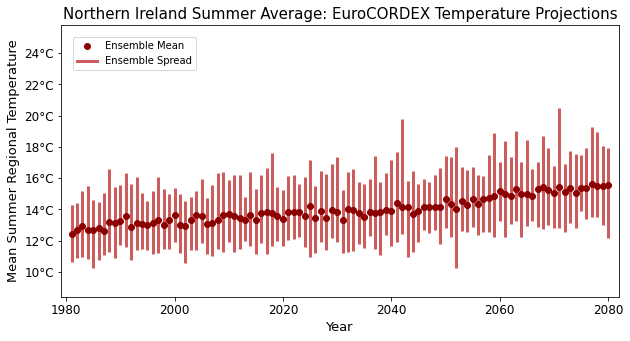

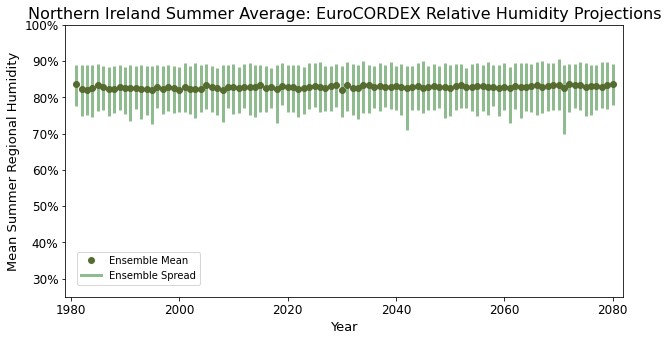

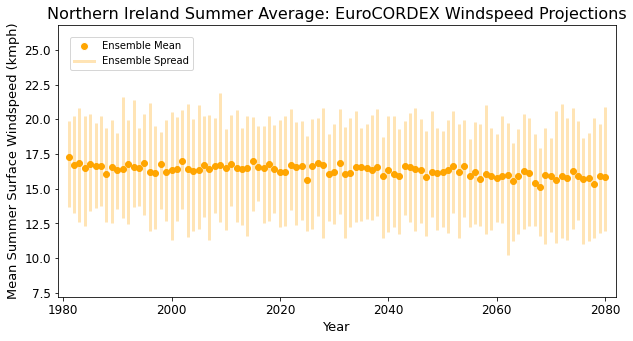

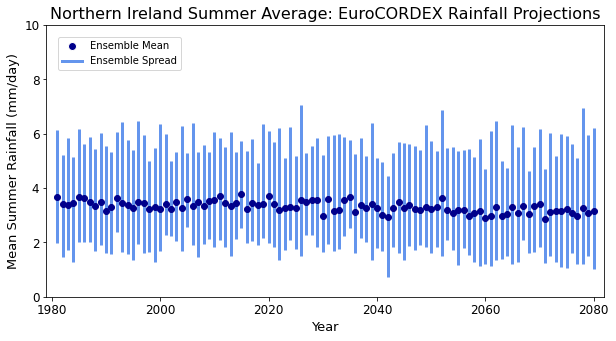

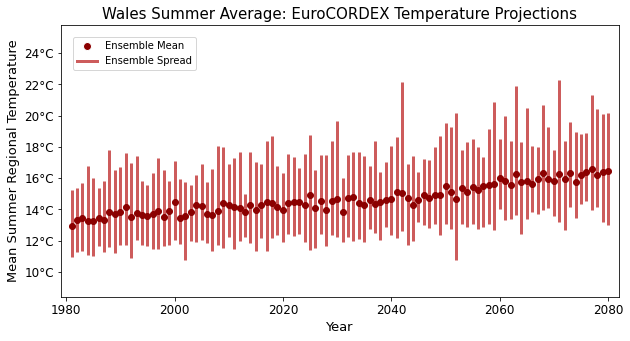

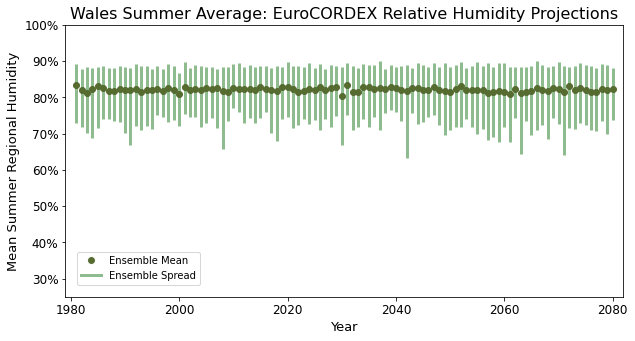

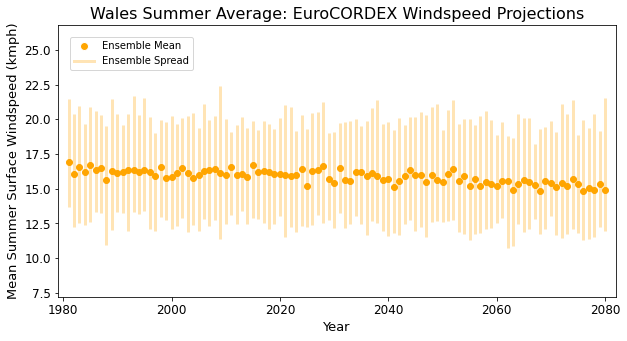

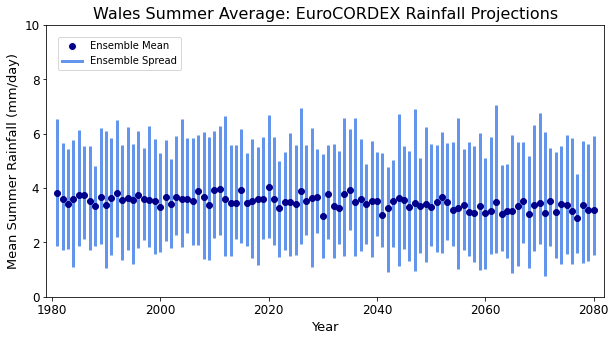

In [7]:
# Making plot:
ids = ['UK', 'East Midlands', 'East of England',
       'East Scotland','London','North-East England',
       'North Scotland','North-West England',
       'South-East England','South-West England',
       'West Midlands','West Scotland',
       'Yorkshire and Humberside',
       'Channel Islands',
       'Isle of Man',
       'Northern Ireland','Wales']
save_ids = ['uk', 'e_mdls', 'e_eng',
       'e_scot','ldn','ne_eng',
       'n_scot','nw_eng',
       'se_eng','sw_eng',
       'w_mdls','w_scot',
       'yorks_n_hums',
       'chnl_isl',
       'isl_man',
       'n_irln','wales']
for j in range(17):
    # Loading data:
    tas_file_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    tas_data = np.array([np.load(fname) for fname in tas_file_names])
    hurs_file_names = [f'/home/theo/outdata/01_data/hurs_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    hurs_data = np.array([np.load(fname) for fname in hurs_file_names])
    wind_file_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    wind_data = np.array([np.load(fname) for fname in wind_file_names])
    pr_file_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' 
                  for i in range(1,49)]
    pr_data = np.array([np.load(fname) for fname in pr_file_names])
    # Making dates:
    dates = np.array([1980 + i for i in range(101)])
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    
        # Plotting Temperature:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(tas_data,axis = 0), 
                     yerr=np.stack((np.nanmean(tas_data,axis = 0) - np.nanmin(tas_data,axis = 0),
                                    np.nanmax(tas_data,axis = 0) - np.nanmean(tas_data,axis = 0))), 
                     fmt='o', color='darkred', ecolor='indianred', 
                     elinewidth=3, capsize=0)
        plt.title(f'{ids[j]} Summer Average: EuroCORDEX Temperature Projections',fontsize=15)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkred', markersize=8),
                   mpl.lines.Line2D([0], [0], color='indianred', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Mean Summer Regional Temperature',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02)
        plt.ylim(8.4,25.8)
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}°C"))
        plt.savefig(f'/home/theo/final_images/1.2.images/summer_tas_mean_{save_ids[j]}')
        
        # Plotting Relative Humidity:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(hurs_data,axis = 0), 
                     yerr=np.stack((np.nanmean(hurs_data,axis = 0) - np.nanmin(hurs_data,axis = 0),
                                    np.nanmax(hurs_data,axis = 0) - np.nanmean(hurs_data,axis = 0))), 
                     fmt='o', color='darkolivegreen', ecolor='darkseagreen', 
                     elinewidth=3, capsize=0)
        plt.title(f'{ids[j]} Summer Average: EuroCORDEX Relative Humidity Projections',fontsize=16)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkolivegreen', markersize=8),
                   mpl.lines.Line2D([0], [0], color='darkseagreen', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=3,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Mean Summer Regional Humidity',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02) 
        plt.ylim(25,100)
        plt.gca().yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
        plt.savefig(f'/home/theo/final_images/1.2.images/summer_hurs_mean_{save_ids[j]}')
        
        # Plotting Wind:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(wind_data,axis = 0), 
                     yerr=np.stack((np.nanmean(wind_data,axis = 0) - np.nanmin(wind_data,axis = 0),
                                    np.nanmax(wind_data,axis = 0) - np.nanmean(wind_data,axis = 0))), 
                     fmt='o', color='orange', ecolor='moccasin', 
                     elinewidth=3, capsize=0)
        plt.title(f'{ids[j]} Summer Average: EuroCORDEX Windspeed Projections',fontsize=16)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='orange', markersize=8),
                   mpl.lines.Line2D([0], [0], color='moccasin', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Mean Summer Surface Windspeed (kmph)',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02)      
        plt.ylim(7.2,26.8)
        plt.savefig(f'/home/theo/final_images/1.2.images/summer_wind_mean_{save_ids[j]}')
        
        # Plotting Rainfall:
        plt.figure(figsize=(10, 5))
        plt.errorbar(dates, np.nanmean(pr_data,axis = 0), 
                     yerr=np.stack((np.nanmean(pr_data,axis = 0) - np.nanmin(pr_data,axis = 0),
                                    np.nanmax(pr_data,axis = 0) - np.nanmean(pr_data,axis = 0))), 
                     fmt='o', color='darkblue', ecolor='cornflowerblue', 
                     elinewidth=3, capsize=0)
        plt.title(f'{ids[j]} Summer Average: EuroCORDEX Rainfall Projections',fontsize=16)
        handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkblue', markersize=8),
                   mpl.lines.Line2D([0], [0], color='cornflowerblue', linewidth=3, linestyle='-')]
        plt.legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
        plt.xlabel('Year',fontsize=13)
        plt.ylabel('Mean Summer Rainfall (mm/day)',fontsize=13)
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.margins(x=0.02)      
        plt.ylim(0,10)
        plt.savefig(f'/home/theo/final_images/1.2.images/summer_pr_mean_{save_ids[j]}')

In [125]:
hurs_file_names = [f'/home/theo/outdata/01_data/hurs_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
hurs_data = np.array([np.load(fname) for fname in hurs_file_names])
print(np.mean(np.mean(hurs_data,axis=0)[:20]))
print(100-100*np.mean(np.mean(hurs_data,axis=0)[-10:])/np.mean(np.mean(hurs_data,axis=0)[:10]))

80.21044368038383
0.8228816364463114


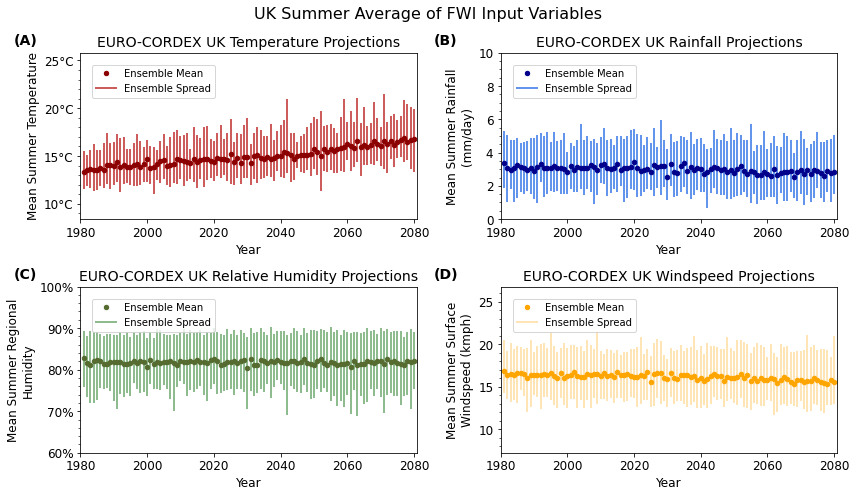

In [113]:
# Making UK Wide Plots

fig, axs = plt.subplots(2,2)
fig.set_figheight(7)
fig.set_figwidth(12)
fig.suptitle('UK Summer Average of FWI Input Variables', fontsize=16)

j = 0
# Loading data:

model_count = 49

tas_file_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
tas_data = np.array([np.load(fname) for fname in tas_file_names])
hurs_file_names = [f'/home/theo/outdata/01_data/hurs_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
hurs_data = np.array([np.load(fname) for fname in hurs_file_names])
wind_file_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
wind_data = np.array([np.load(fname) for fname in wind_file_names])
pr_file_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
pr_data = np.array([np.load(fname) for fname in pr_file_names])
# Making dates:
dates = np.array([1981 + i for i in range(100)])


# Plotting Temperature:
axs[0,0].errorbar(dates, np.nanmean(tas_data,axis = 0), 
             yerr=np.stack((np.nanmean(tas_data,axis = 0) - np.nanmin(tas_data,axis = 0),
                            np.nanmax(tas_data,axis = 0) - np.nanmean(tas_data,axis = 0))), 
             fmt='o', color='darkred', ecolor='indianred', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[0,0].set_title(f'EURO-CORDEX UK Temperature Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkred', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='indianred', linewidth=2, linestyle='-')]
axs[0,0].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[0,0].set_xlabel('Year',fontsize=12)
axs[0,0].set_ylabel('Mean Summer Temperature',fontsize=12)
axs[0,0].tick_params(labelsize = 12)
axs[0,0].set_ylim(8.4,25.8)
axs[0,0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}°C"))
axs[0,0].set_xlim(1980,2081)
axs[0,0].text(1960,8.4+(25.8-8.4)*1.05,'(A)', size=14,weight='bold')
axs[0,0].minorticks_on()
axs[0,0].xaxis.set_tick_params(which='minor', bottom=False)

# Plotting Relative Humidity:
axs[1,0].errorbar(dates, np.nanmean(hurs_data,axis = 0), 
             yerr=np.stack((np.nanmean(hurs_data,axis = 0) - np.nanmin(hurs_data,axis = 0),
                            np.nanmax(hurs_data,axis = 0) - np.nanmean(hurs_data,axis = 0))), 
             fmt='o', color='darkolivegreen', ecolor='darkseagreen', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[1,0].set_title(f'EURO-CORDEX UK Relative Humidity Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkolivegreen', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='darkseagreen', linewidth=2, linestyle='-')]
axs[1,0].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[1,0].set_xlabel('Year',fontsize=12)
axs[1,0].set_ylabel('Mean Summer Regional\nHumidity',fontsize=12)
axs[1,0].tick_params(labelsize = 12)
axs[1,0].set_ylim(60,100)
axs[1,0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}%"))
axs[1,0].set_xlim(1980,2081)
axs[1,0].text(1960,60+(100-60)*1.05,'(C)', size=14,weight='bold')
axs[1,0].minorticks_on()
axs[1,0].xaxis.set_tick_params(which='minor', bottom=False)

# Plotting Wind:
axs[1,1].errorbar(dates, np.nanmean(wind_data,axis = 0), 
             yerr=np.stack((np.nanmean(wind_data,axis = 0) - np.nanmin(wind_data,axis = 0),
                            np.nanmax(wind_data,axis = 0) - np.nanmean(wind_data,axis = 0))), 
             fmt='o', color='orange', ecolor='moccasin', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[1,1].set_title(f'EURO-CORDEX UK Windspeed Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='orange', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='moccasin', linewidth=2, linestyle='-')]
axs[1,1].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[1,1].set_xlabel('Year',fontsize=12)
axs[1,1].set_ylabel('Mean Summer Surface\nWindspeed (kmph)',fontsize=12)
axs[1,1].tick_params(labelsize = 12) 
axs[1,1].set_ylim(7.2,26.8)
axs[1,1].set_xlim(1980,2081)
axs[1,1].text(1960,7.2+(26.8-7.2)*1.05,'(D)', size=14,weight='bold')
axs[1,1].minorticks_on()
axs[1,1].xaxis.set_tick_params(which='minor', bottom=False)

# Plotting Rainfall:
axs[0,1].errorbar(dates, np.nanmean(pr_data,axis = 0), 
             yerr=np.stack((np.nanmean(pr_data,axis = 0) - np.nanmin(pr_data,axis = 0),
                            np.nanmax(pr_data,axis = 0) - np.nanmean(pr_data,axis = 0))), 
             fmt='o', color='darkblue', ecolor='cornflowerblue', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[0,1].set_title(f'EURO-CORDEX UK Rainfall Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkblue', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='cornflowerblue', linewidth=2, linestyle='-')]
axs[0,1].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[0,1].set_xlabel('Year',fontsize=12)
axs[0,1].set_ylabel('Mean Summer Rainfall\n(mm/day)',fontsize=12)
axs[0,1].tick_params(labelsize=12)
axs[0,1].set_ylim(0,10)
axs[0,1].set_xlim(1980,2081)
axs[0,1].text(1960,0+(10-0)*1.05,'(B)', size=14,weight='bold')
axs[0,1].minorticks_on()
axs[0,1].xaxis.set_tick_params(which='minor', bottom=False)


plt.tight_layout()
plt.savefig('/home/theo/final_images/1.2.images/_UK_input_variables')

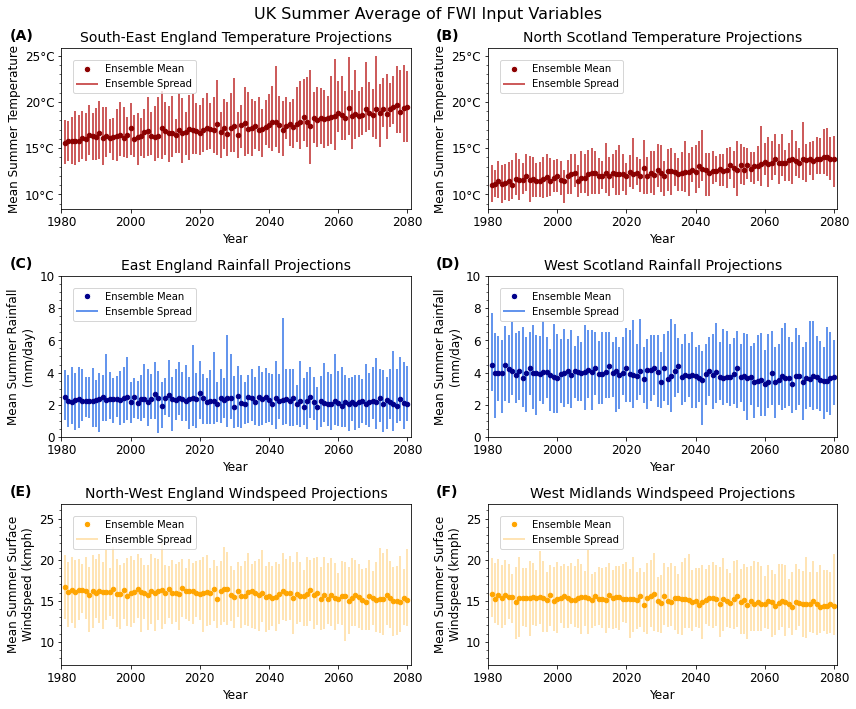

In [115]:
# Making Regional Effects Plots

fig, axs = plt.subplots(3,2)
fig.set_figheight(10)
fig.set_figwidth(12)
fig.suptitle('UK Summer Average of FWI Input Variables', fontsize=16)

j = 0
# Loading data:

model_count = 49

# Making dates:
dates = np.array([1981 + i for i in range(100)])


# Plotting se_eng_temp:
j = 8
tas_file_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
tas_data = np.array([np.load(fname) for fname in tas_file_names])
axs[0,0].errorbar(dates, np.nanmean(tas_data,axis = 0), 
             yerr=np.stack((np.nanmean(tas_data,axis = 0) - np.nanmin(tas_data,axis = 0),
                            np.nanmax(tas_data,axis = 0) - np.nanmean(tas_data,axis = 0))), 
             fmt='o', color='darkred', ecolor='indianred', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[0,0].set_title(f'South-East England Temperature Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkred', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='indianred', linewidth=2, linestyle='-')]
axs[0,0].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[0,0].set_xlabel('Year',fontsize=12)
axs[0,0].set_ylabel('Mean Summer Temperature',fontsize=12)
axs[0,0].tick_params(labelsize = 12)
axs[0,0].set_ylim(8.4,25.8)
axs[0,0].text(1965,8.4+(25.8-8.4)*1.05,'(A)', size=14,weight='bold')
axs[0,0].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}°C"))
axs[0,0].set_xlim(1980,2081)
axs[0,0].minorticks_on()
axs[0,0].xaxis.set_tick_params(which='minor', bottom=False)


# Plotting n_scot_temp:
j = 6
tas_file_names = [f'/home/theo/outdata/01_data/tas_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
tas_data = np.array([np.load(fname) for fname in tas_file_names])
axs[0,1].errorbar(dates, np.nanmean(tas_data,axis = 0), 
             yerr=np.stack((np.nanmean(tas_data,axis = 0) - np.nanmin(tas_data,axis = 0),
                            np.nanmax(tas_data,axis = 0) - np.nanmean(tas_data,axis = 0))), 
             fmt='o', color='darkred', ecolor='indianred', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[0,1].set_title(f'North Scotland Temperature Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkred', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='indianred', linewidth=2, linestyle='-')]
axs[0,1].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[0,1].set_xlabel('Year',fontsize=12)
axs[0,1].set_ylabel('Mean Summer Temperature',fontsize=12)
axs[0,1].tick_params(labelsize = 12)
axs[0,1].set_ylim(8.4,25.8)
axs[0,1].text(1965,8.4+(25.8-8.4)*1.05,'(B)', size=14,weight='bold')
axs[0,1].yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter(u"{x:.0f}°C"))
axs[0,1].set_xlim(1980,2081)
axs[0,1].minorticks_on()
axs[0,1].xaxis.set_tick_params(which='minor', bottom=False)

# Plotting e_eng_rain:
j = 2
pr_file_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
pr_data = np.array([np.load(fname) for fname in pr_file_names])
axs[1,0].errorbar(dates, np.nanmean(pr_data,axis = 0), 
             yerr=np.stack((np.nanmean(pr_data,axis = 0) - np.nanmin(pr_data,axis = 0),
                            np.nanmax(pr_data,axis = 0) - np.nanmean(pr_data,axis = 0))), 
             fmt='o', color='darkblue', ecolor='cornflowerblue', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[1,0].set_title(f'East England Rainfall Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkblue', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='cornflowerblue', linewidth=2, linestyle='-')]
axs[1,0].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[1,0].set_xlabel('Year',fontsize=12)
axs[1,0].set_ylabel('Mean Summer Rainfall\n(mm/day)',fontsize=12)
axs[1,0].tick_params(labelsize=12)
axs[1,0].set_ylim(0,10)
axs[1,0].text(1965,0+(10-0)*1.05,'(C)', size=14,weight='bold')
axs[1,0].set_xlim(1980,2081)
axs[1,0].minorticks_on()
axs[1,0].xaxis.set_tick_params(which='minor', bottom=False)


# Plotting w_scot:
j = 11
pr_file_names = [f'/home/theo/outdata/01_data/pr_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
pr_data = np.array([np.load(fname) for fname in pr_file_names])
axs[1,1].errorbar(dates, np.nanmean(pr_data,axis = 0), 
             yerr=np.stack((np.nanmean(pr_data,axis = 0) - np.nanmin(pr_data,axis = 0),
                            np.nanmax(pr_data,axis = 0) - np.nanmean(pr_data,axis = 0))), 
             fmt='o', color='darkblue', ecolor='cornflowerblue', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[1,1].set_title(f'West Scotland Rainfall Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='darkblue', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='cornflowerblue', linewidth=2, linestyle='-')]
axs[1,1].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[1,1].set_xlabel('Year',fontsize=12)
axs[1,1].set_ylabel('Mean Summer Rainfall\n(mm/day)',fontsize=12)
axs[1,1].tick_params(labelsize=12)
axs[1,1].set_ylim(0,10)
axs[1,1].text(1965,0+(10-0)*1.05,'(D)', size=14,weight='bold')
axs[1,1].set_xlim(1980,2081)
axs[1,1].minorticks_on()
axs[1,1].xaxis.set_tick_params(which='minor', bottom=False)


# Plotting nw_eng_wind:
j=7
wind_file_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
wind_data = np.array([np.load(fname) for fname in wind_file_names])
axs[2,0].errorbar(dates, np.nanmean(wind_data,axis = 0), 
             yerr=np.stack((np.nanmean(wind_data,axis = 0) - np.nanmin(wind_data,axis = 0),
                            np.nanmax(wind_data,axis = 0) - np.nanmean(wind_data,axis = 0))), 
             fmt='o', color='orange', ecolor='moccasin', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[2,0].set_title(f'North-West England Windspeed Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='orange', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='moccasin', linewidth=2, linestyle='-')]
axs[2,0].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[2,0].set_xlabel('Year',fontsize=12)
axs[2,0].set_ylabel('Mean Summer Surface\nWindspeed (kmph)',fontsize=12)
axs[2,0].tick_params(labelsize = 12) 
axs[2,0].set_ylim(7.2,26.8)
axs[2,0].text(1965,7.2+(26.8-7.2)*1.05,'(E)', size=14,weight='bold')
axs[2,0].set_xlim(1980,2081)
axs[2,0].minorticks_on()
axs[2,0].xaxis.set_tick_params(which='minor', bottom=False)


# Plotting w_mid_wind:
j=10
wind_file_names = [f'/home/theo/outdata/01_data/wind_model_{i+1}_region_{j}_summer.npy' 
              for i in range(1,model_count)]
wind_data = np.array([np.load(fname) for fname in wind_file_names])
axs[2,1].errorbar(dates, np.nanmean(wind_data,axis = 0), 
             yerr=np.stack((np.nanmean(wind_data,axis = 0) - np.nanmin(wind_data,axis = 0),
                            np.nanmax(wind_data,axis = 0) - np.nanmean(wind_data,axis = 0))), 
             fmt='o', color='orange', ecolor='moccasin', 
             markersize=4.5,elinewidth=2, capsize=0)
axs[2,1].set_title(f'West Midlands Windspeed Projections',fontsize=14)
handles = [mpl.lines.Line2D([0], [0], marker='o', color='w',markerfacecolor='orange', markersize=6.5),
           mpl.lines.Line2D([0], [0], color='moccasin', linewidth=2, linestyle='-')]
axs[2,1].legend(handles,['Ensemble Mean','Ensemble Spread'],loc=2,borderaxespad=1.2)
axs[2,1].set_xlabel('Year',fontsize=12)
axs[2,1].set_ylabel('Mean Summer Surface\nWindspeed (kmph)',fontsize=12)
axs[2,1].tick_params(labelsize = 12) 
axs[2,1].set_ylim(7.2,26.8)
axs[2,1].text(1965,7.2+(26.8-7.2)*1.05,'(F)', size=14,weight='bold')
axs[2,1].set_xlim(1980,2081)
axs[2,1].minorticks_on()
axs[2,1].xaxis.set_tick_params(which='minor', bottom=False)




plt.tight_layout()
plt.savefig('/home/theo/final_images/1.2.images/_regional_input_variables')

In [76]:
save_ids = ['uk', 'e_mdls', 'e_eng',
       'e_scot','ldn','ne_eng',
       'n_scot','nw_eng',
       'se_eng','sw_eng',
       'w_mdls','w_scot',
       'yorks_n_hums',
       'chnl_isl',
       'isl_man',
       'n_irln','wales']
print(save_ids[0])
print(save_ids[8])
print(save_ids[6])
print(save_ids[2])
print(save_ids[11])
print(save_ids[10])
print(save_ids[7])

uk
se_eng
n_scot
e_eng
w_scot
w_mdls
nw_eng
